Capstone Project 
For NTUC Learning Hub
Dengue Fever outbreak Analysis for Singapore
Datasets abstract from NEA

In [125]:
# Importing necessary libraries needed in EDA
import numpy as np
import pandas as pd

# for visualisation
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px  

import plotly as py
import plotly.graph_objs as go

# machine learning application
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.tree import DecisionTreeRegressor
from sklearn.cluster import KMeans
from sklearn.preprocessing import PolynomialFeatures

In [98]:
# ignore all warnings
import warnings
warnings.filterwarnings('ignore')

In [100]:
# Desired CSV file's GitHub address
url = 'https://raw.githubusercontent.com/mFadzilb/Dengue-clusters-CSV-by-NEA-Singapore/main/140815-clusters_r1.csv'

# Read the CSV file into a Pandas DataFrame
df = pd.read_csv(url)

In [102]:
# Dataset First Look
df

,Number_Of_Cases,Street_Address,Latitude,Longitude,Cluster_Number,Recent_Cases_In_Cluster,Total_Cases_In_Cluster,Date,Month_Number
0,1,choa chu kang avenue 2,1.378437,103.743747,1,2,533,140815,8
1,30,choa chu kang avenue 2 (block 296),1.377421,103.740759,1,2,533,140815,8
2,25,choa chu kang avenue 2 (block 296a),1.377133,103.740941,1,2,533,140815,8
3,23,choa chu kang avenue 2 (block 296b),1.376838,103.741413,1,2,533,140815,8
4,13,choa chu kang avenue 2 (block 296c),1.376565,103.742240,1,2,533,140815,8
...,...,...,...,...,...,...,...,...,...
394,1,telok blangah heights (block 61),1.275763,103.811716,81,2,2,140815,8
395,1,towner road (block 103),1.320730,103.861588,82,2,2,140815,8
396,1,whampoa west (block 34),1.320412,103.863726,82,2,2,140815,8
397,1,upper boon keng road (block 14a),1.315225,103.870520,83,2,2,140815,8


In [5]:
# Now you can work with the data in the 'df' DataFrame
df.head()  # Display the first few rows

,Number_Of_Cases,Street_Address,Latitude,Longitude,Cluster_Number,Recent_Cases_In_Cluster,Total_Cases_In_Cluster,Date,Month_Number
0,1,choa chu kang avenue 2,1.378437,103.743747,1,2,533,140815,8
1,30,choa chu kang avenue 2 (block 296),1.377421,103.740759,1,2,533,140815,8
2,25,choa chu kang avenue 2 (block 296a),1.377133,103.740941,1,2,533,140815,8
3,23,choa chu kang avenue 2 (block 296b),1.376838,103.741413,1,2,533,140815,8
4,13,choa chu kang avenue 2 (block 296c),1.376565,103.742240,1,2,533,140815,8


In [6]:
df.tail() # Display the last few rows

,Number_Of_Cases,Street_Address,Latitude,Longitude,Cluster_Number,Recent_Cases_In_Cluster,Total_Cases_In_Cluster,Date,Month_Number
394,1,telok blangah heights (block 61),1.275763,103.811716,81,2,2,140815,8
395,1,towner road (block 103),1.320730,103.861588,82,2,2,140815,8
396,1,whampoa west (block 34),1.320412,103.863726,82,2,2,140815,8
397,1,upper boon keng road (block 14a),1.315225,103.870520,83,2,2,140815,8
398,1,upper boon keng road (block 16),1.315530,103.871519,83,2,2,140815,8


In [7]:
# Dataset Rows & Columns count
print(f'Number of rows : {len(df.axes[0])}')
print(f'Number of rows : {len(df.axes[1])}')

Number of rows : 399
Number of rows : 9


In [8]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Number_Of_Cases          399 non-null    int64  
 1   Street_Address           399 non-null    object 
 2   Latitude                 399 non-null    float64
 3   Longitude                399 non-null    float64
 4   Cluster_Number           399 non-null    int64  
 5   Recent_Cases_In_Cluster  399 non-null    int64  
 6   Total_Cases_In_Cluster   399 non-null    int64  
 7   Date                     399 non-null    int64  
 8   Month_Number             399 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 28.2+ KB


In [9]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

In [10]:
# Missing Values/Null Values Count
df.isnull().sum()

Number_Of_Cases            0
Street_Address             0
Latitude                   0
Longitude                  0
Cluster_Number             0
Recent_Cases_In_Cluster    0
Total_Cases_In_Cluster     0
Date                       0
Month_Number               0
dtype: int64

In [11]:
# Dataset Columns
df.columns

Index(['Number_Of_Cases', 'Street_Address', 'Latitude', 'Longitude',
       'Cluster_Number', 'Recent_Cases_In_Cluster', 'Total_Cases_In_Cluster',
       'Date', 'Month_Number'],
      dtype='object')

In [12]:
# Dataset Describe
df.describe()

,Number_Of_Cases,Latitude,Longitude,Cluster_Number,Recent_Cases_In_Cluster,Total_Cases_In_Cluster,Date,Month_Number
count,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.0,399.0
mean,4.308271,1.354513,103.838214,20.511278,6.125313,115.719298,140815.0,8.0
std,10.425264,0.031198,0.073523,23.399829,7.903904,149.278824,0.0,0.0
min,1.000000,1.275500,103.695401,1.000000,1.000000,2.000000,140815.0,8.0
25%,1.000000,1.326704,103.743023,3.000000,2.000000,5.000000,140815.0,8.0
50%,2.000000,1.357763,103.871396,8.000000,3.000000,38.000000,140815.0,8.0
75%,4.000000,1.378193,103.887063,34.500000,6.000000,212.000000,140815.0,8.0
max,187.000000,1.453712,103.967911,83.000000,27.000000,533.000000,140815.0,8.0


In [13]:
# Check Unique Values for each variable.
pd.Series({col:df[col].unique() for col in df})           # creating a series consisting every column name of the dataset and it's value.
                                                                # used for loop to iterate over every column in the dataset

Number_Of_Cases            [1, 30, 25, 23, 13, 4, 7, 15, 2, 3, 11, 14, 6,...
Street_Address             [choa chu kang avenue 2, choa chu kang avenue ...
Latitude                   [1.378437, 1.377421, 1.377133, 1.376838, 1.376...
Longitude                  [103.743747, 103.740759, 103.740941, 103.74141...
Cluster_Number             [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
Recent_Cases_In_Cluster                        [2, 3, 27, 6, 5, 1, 7, 13, 4]
Total_Cases_In_Cluster     [533, 225, 212, 77, 65, 58, 53, 38, 37, 29, 25...
Date                                                                [140815]
Month_Number                                                             [8]
dtype: object

In [14]:
#Getting cluster numbers

print(df['Cluster_Number'].unique())

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83]


<Axes: xlabel='count', ylabel='Cluster_Number'>

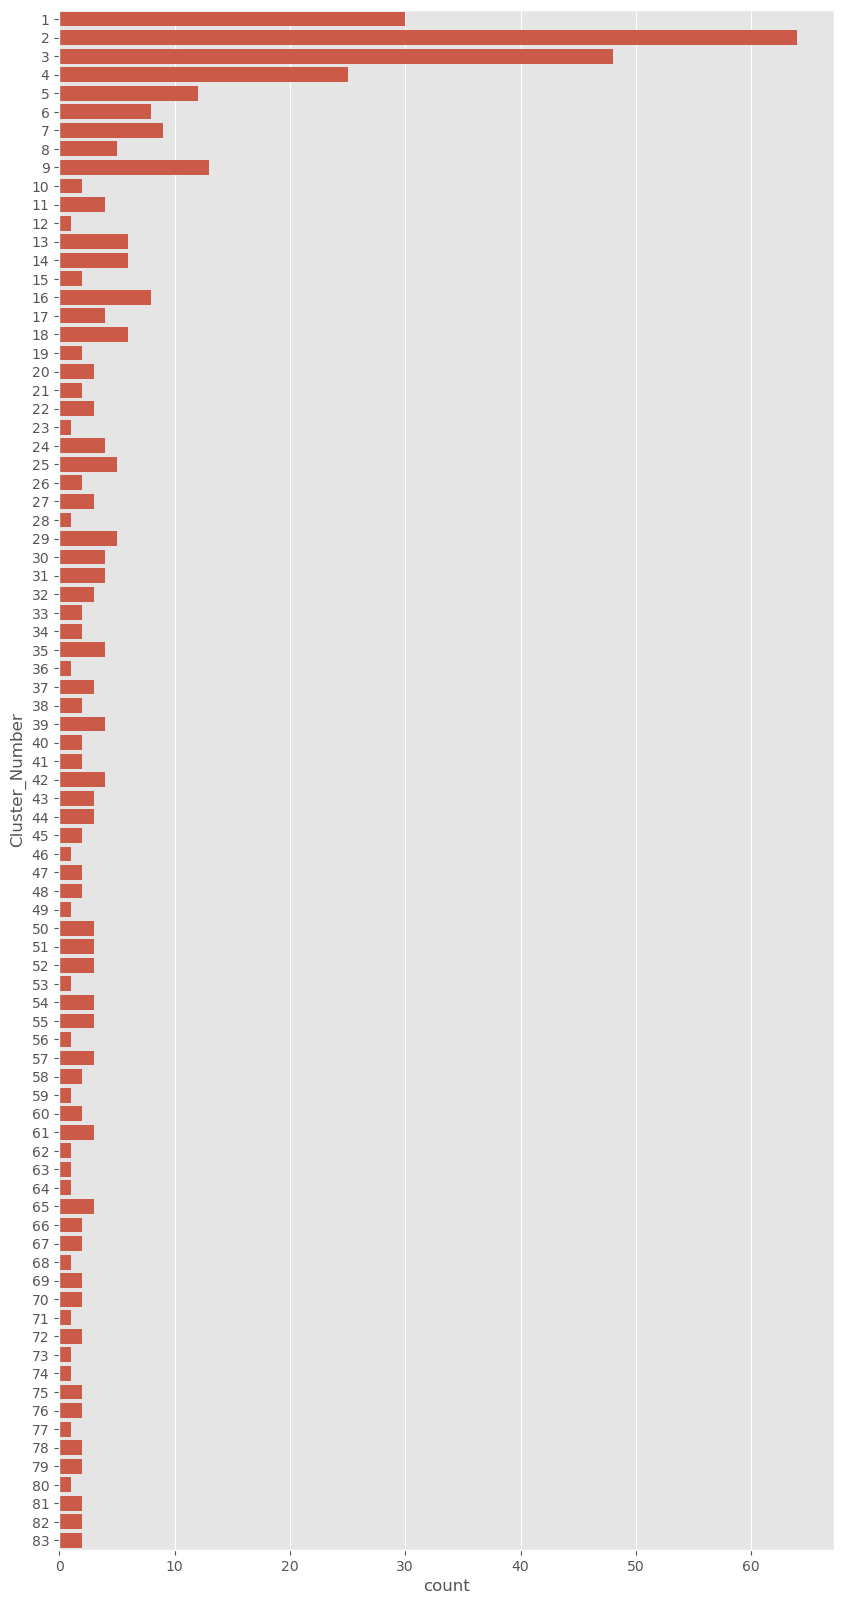

In [15]:
plt.figure(figsize=(10, 20))
sns.countplot(y="Cluster_Number", data=df)

<Figure size 1200x600 with 0 Axes>

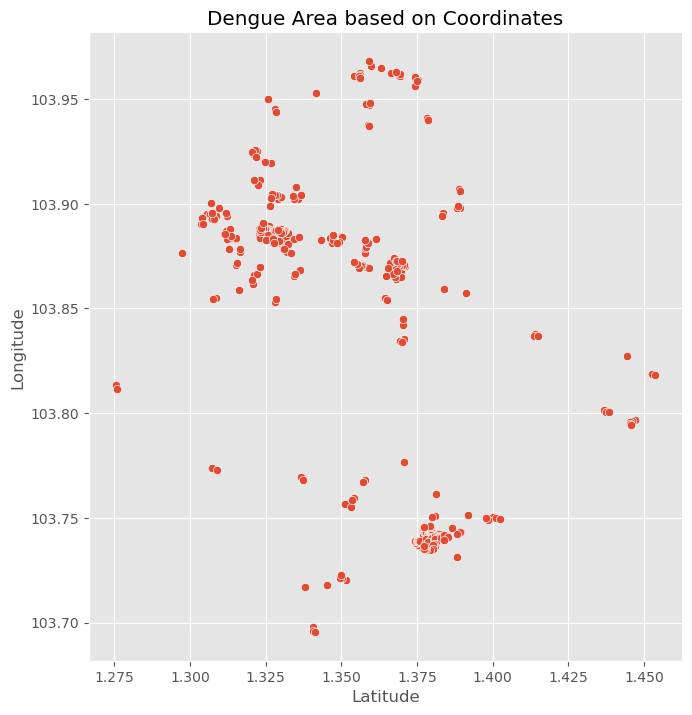

In [16]:
# These Plots help to explain the values and how they are scattered based on coordinates

plt.figure(figsize=(12,6))
sns.pairplot(df,x_vars=['Latitude'],y_vars=['Longitude'],height=7,kind='scatter')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Dengue Area based on Coordinates')
plt.show()

In [17]:
features_histogram = df[["Number_Of_Cases", "Street_Address", "Latitude", "Longitude", "Cluster_Number", "Recent_Cases_In_Cluster", "Total_Cases_In_Cluster", "Date", "Month_Number"]]    

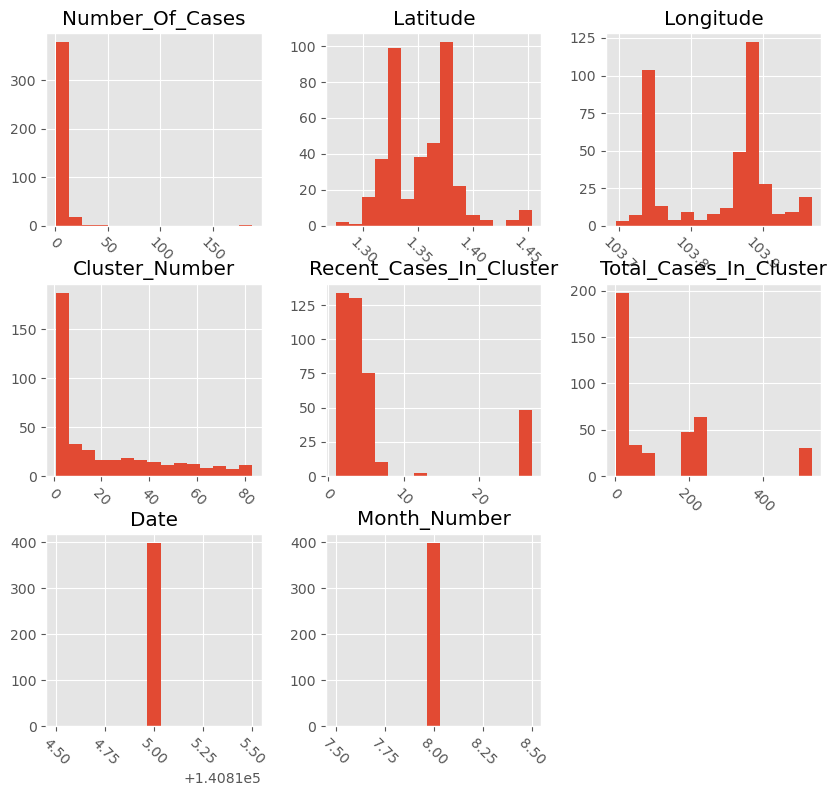

In [18]:
# Plot histogram grid
features_histogram.hist(figsize=(10,9), xrot=-45, bins=15) ## Display the labels rotated by 45 degress

# Clear the text "residue"
plt.show()

In [19]:
correlation_matrix = df[["Latitude", "Longitude", "Number_Of_Cases"]].corr()


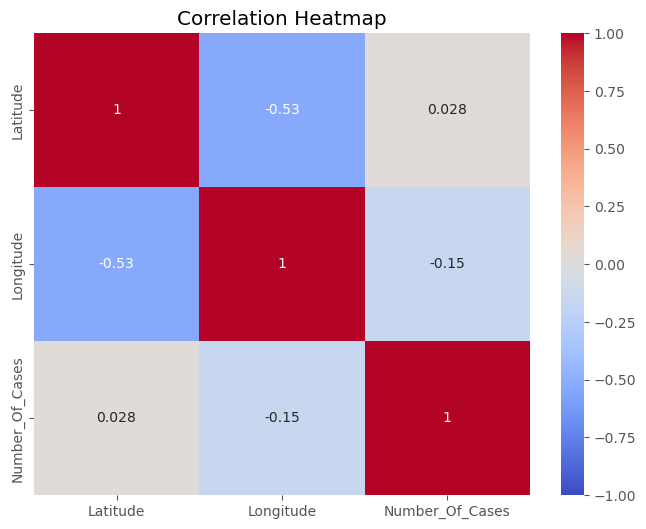

In [20]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()

In [21]:
import folium

#Create a Map: Initialize a Folium map of Singapore). 
#You can adjust the zoom level as needed
m = folium.Map(location=(1.35216, 103.8198))
m

In [22]:
for _, row in df.iterrows():
    folium.CircleMarker(
        location=[row["Latitude"], row["Longitude"]],
        radius=10,
        fill_color="red",  # Customize the color
        popup=f"Cases: {row['Number_Of_Cases']}"
    ).add_to(m)


In [23]:
# Display dengue area using datasets coordinates Latitude and longitude
m

In [24]:
# Assuming you have loaded the dataset into a DataFrame called 'data'
cluster_means = df.groupby('Cluster_Number').agg({
    'Latitude': 'mean',
    'Longitude': 'mean',
    'Number_Of_Cases': 'mean',
    'Date': 'mean' ##
}).reset_index()

print(cluster_means)

    Cluster_Number  Latitude   Longitude  Number_Of_Cases      Date
0                1  1.376563  103.739857        17.766667  140815.0
1                2  1.380064  103.739895         3.515625  140815.0
2                3  1.325249  103.886626         4.416667  140815.0
3                4  1.368049  103.869556         3.080000  140815.0
4                5  1.330731  103.882643         5.416667  140815.0
..             ...       ...         ...              ...       ...
78              79  1.358885  103.937382         1.000000  140815.0
79              80  1.297424  103.876491         2.000000  140815.0
80              81  1.275631  103.812478         1.000000  140815.0
81              82  1.320571  103.862657         1.000000  140815.0
82              83  1.315378  103.871019         1.000000  140815.0

[83 rows x 5 columns]


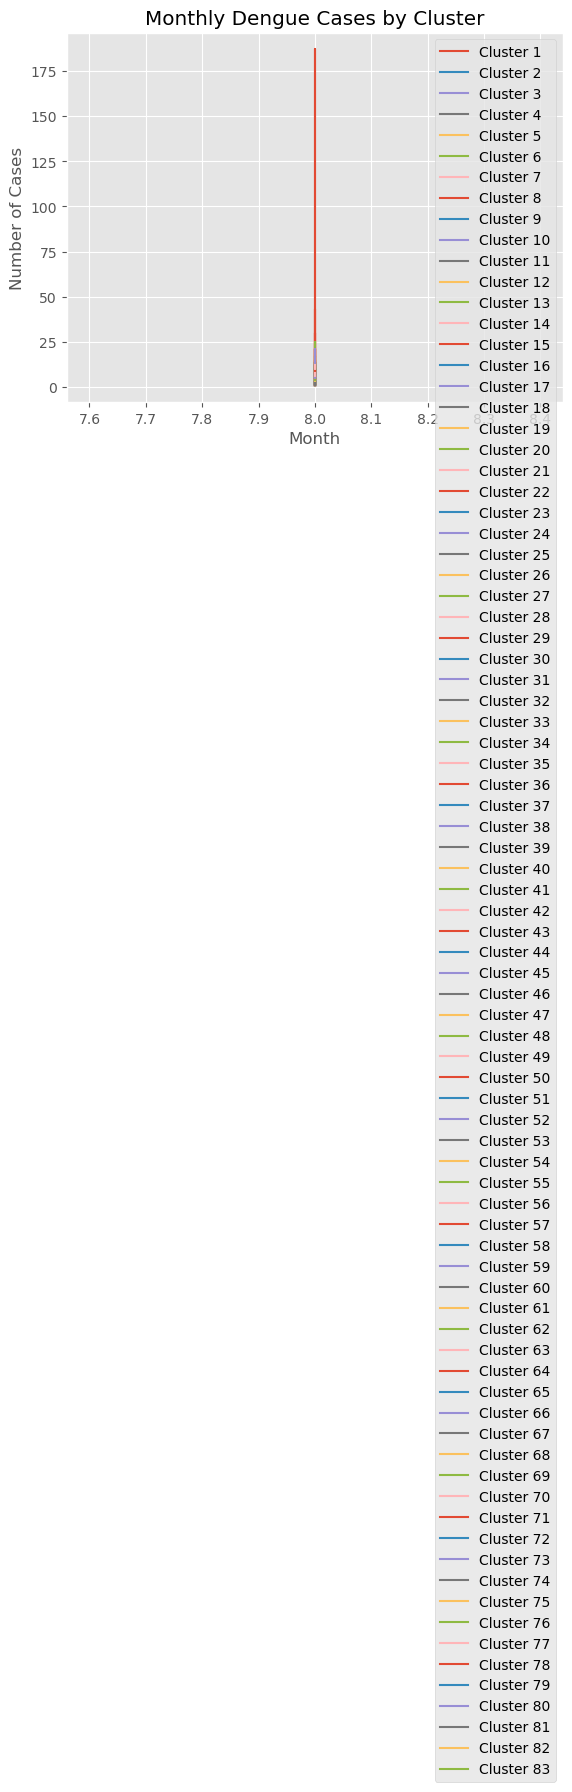

In [25]:
# Assuming you have a 'Date' column in your dataset
df['Date'] = pd.to_datetime(df['Date'], format='%d%m%y')
df['Month'] = df['Date'].dt.month

# Plot monthly cases for each cluster
import matplotlib.pyplot as plt

for cluster_number, cluster_data in df.groupby('Cluster_Number'):
    plt.plot(cluster_data['Month'], cluster_data['Number_Of_Cases'], label=f'Cluster {cluster_number}')

plt.xlabel('Month')
plt.ylabel('Number of Cases')
plt.title('Monthly Dengue Cases by Cluster')
plt.legend()
plt.show()

In [26]:
X=df[["Number_Of_Cases","Total_Cases_In_Cluster","Recent_Cases_In_Cluster","Cluster_Number"]]
y=df["Total_Cases_In_Cluster"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
#Linear Regression model

lr = LinearRegression()

In [28]:
#Fitting the model
lr.fit(X_train, y_train)

LinearRegression()

In [29]:
#Prediction using 

y_pred=lr.predict(X_test)

In [30]:
#r2 score
print('Coefficient of determination: ', r2_score(y_test, y_pred))

Coefficient of determination:  1.0


In [31]:
#Here we make a sample prediction
Number_Of_Cases=200
Total_Cases_In_Cluster=50
Recent_Cases_In_Cluster=20
Cluster_Number=1

#Defining the X and y of machine learning
X=df[["Number_Of_Cases","Total_Cases_In_Cluster","Recent_Cases_In_Cluster","Cluster_Number"]].values
y=df["Total_Cases_In_Cluster"].values

In [32]:
print("The model predicts dengue will be=")
print(lr.predict([[200,533,20,1]])[0])

The model predicts dengue will be=
532.9999999999999


In [33]:
#decision tree regressor 
dt = DecisionTreeRegressor()

In [34]:
#fitting the score and model score

dt.fit(X_train, y_train)
dt.score(X_train, y_train)

1.0

In [35]:
#prediction of  test values

dt.predict(X_test)

array([ 38.,   3., 225.,  37., 225., 225.,   2., 212.,  21., 212., 533.,
         3., 225., 225., 212., 225.,   2.,   6.,  18.,   2., 225., 533.,
         2.,  14., 533.,   2., 212.,  17.,   9., 212.,   2.,   2.,   5.,
       225.,   4., 212., 212.,   9.,  77., 212.,   4., 225., 225., 533.,
       225.,   2.,  77.,  58., 533.,  65., 225.,   5.,   3., 225.,   3.,
       225.,   5.,   4., 225.,  77., 212.,  58.,  65., 225., 212., 225.,
         7.,   3.,  38., 225.,   3., 212., 533., 225.,   2.,  11.,  21.,
         3.,  65.,   5.])

In [36]:
print("The model predicts will be=")
print(dt.predict([[60,500,100,50]])[0])

The model predicts will be=
225.0


In [37]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 4.620831638422599e-27


In [38]:
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train_scaled, y_train, epochs=100, batch_size=32)

y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 32569.8594
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 37327.6367 
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 38299.4883 
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 31007.2383 
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 41306.6836 
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 35516.6250 
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 31935.4023  
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 37487.6641 
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 29648.4258 
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 34909.7852 
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 32109.2617 
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 32508.5195 
Epoch 13/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 30840.8984 
Epoch 14/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 26784.5898 
E

In [39]:
dengue_threshold = 10  # Adjust this threshold based on your data
df['Dengue_Zone'] = (df['Number_Of_Cases'] > dengue_threshold).astype(int)

In [40]:
#X=df[["Number_Of_Cases","Total_Cases_In_Cluster","Recent_Cases_In_Cluster","Cluster_Number"]]
X = df[['Latitude', 'Longitude', 'Cluster_Number', 'Recent_Cases_In_Cluster', 'Total_Cases_In_Cluster']]  # Features
y = df['Dengue_Zone']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
from sklearn.metrics import precision_score, recall_score, f1_score

# ... your model training and prediction code

y_pred_binary = (y_pred > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary, zero_division=1)  # Set to 1 for handling no predicted samples
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

print("Accuracy:", accuracy)
print("Precision:", precision)  # Will be 1 if no positive samples predicted
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.15
Precision: 0.05555555555555555
Recall: 1.0
F1-score: 0.10526315789473684


In [42]:
len(df)

399

In [43]:
len(y_pred)

80

In [44]:
# Ensure y_pred and df have the same length
if len(y_pred) != len(df)/4.9875:
    raise ValueError("y_pred and df must have the same length.")

In [45]:
m = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=12)

Number_Of_Cases            0
Street_Address             0
Latitude                   0
Longitude                  0
Cluster_Number             0
Recent_Cases_In_Cluster    0
Total_Cases_In_Cluster     0
Date                       0
Month_Number               0
Month                      0
Dengue_Zone                0
dtype: int64
       Number_Of_Cases    Latitude   Longitude  Cluster_Number  \
count       399.000000  399.000000  399.000000      399.000000   
mean          4.308271    1.354513  103.838214       20.511278   
min           1.000000    1.275500  103.695401        1.000000   
25%           1.000000    1.326704  103.743023        3.000000   
50%           2.000000    1.357763  103.871396        8.000000   
75%           4.000000    1.378193  103.887063       34.500000   
max         187.000000    1.453712  103.967911       83.000000   
std          10.425264    0.031198    0.073523       23.399829   

       Recent_Cases_In_Cluster  Total_Cases_In_Cluster                 Da

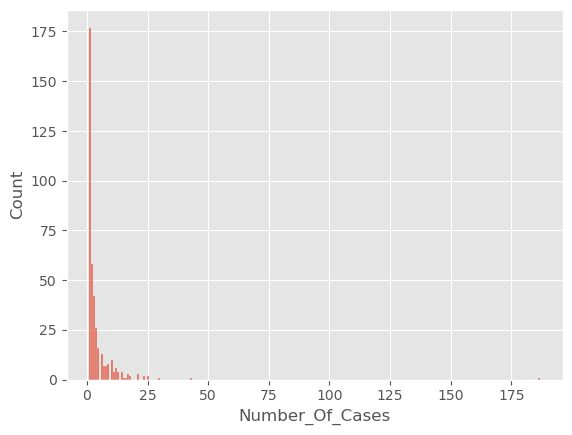

In [46]:
# Check for missing values
print(df.isnull().sum())

# Descriptive statistics
print(df.describe())

# Visualize the distribution of number of cases
sns.histplot(df['Number_Of_Cases'])
plt.show()

# Correlation matrix
#sns.heatmap(df.corr(), annot=True)
plt.show()

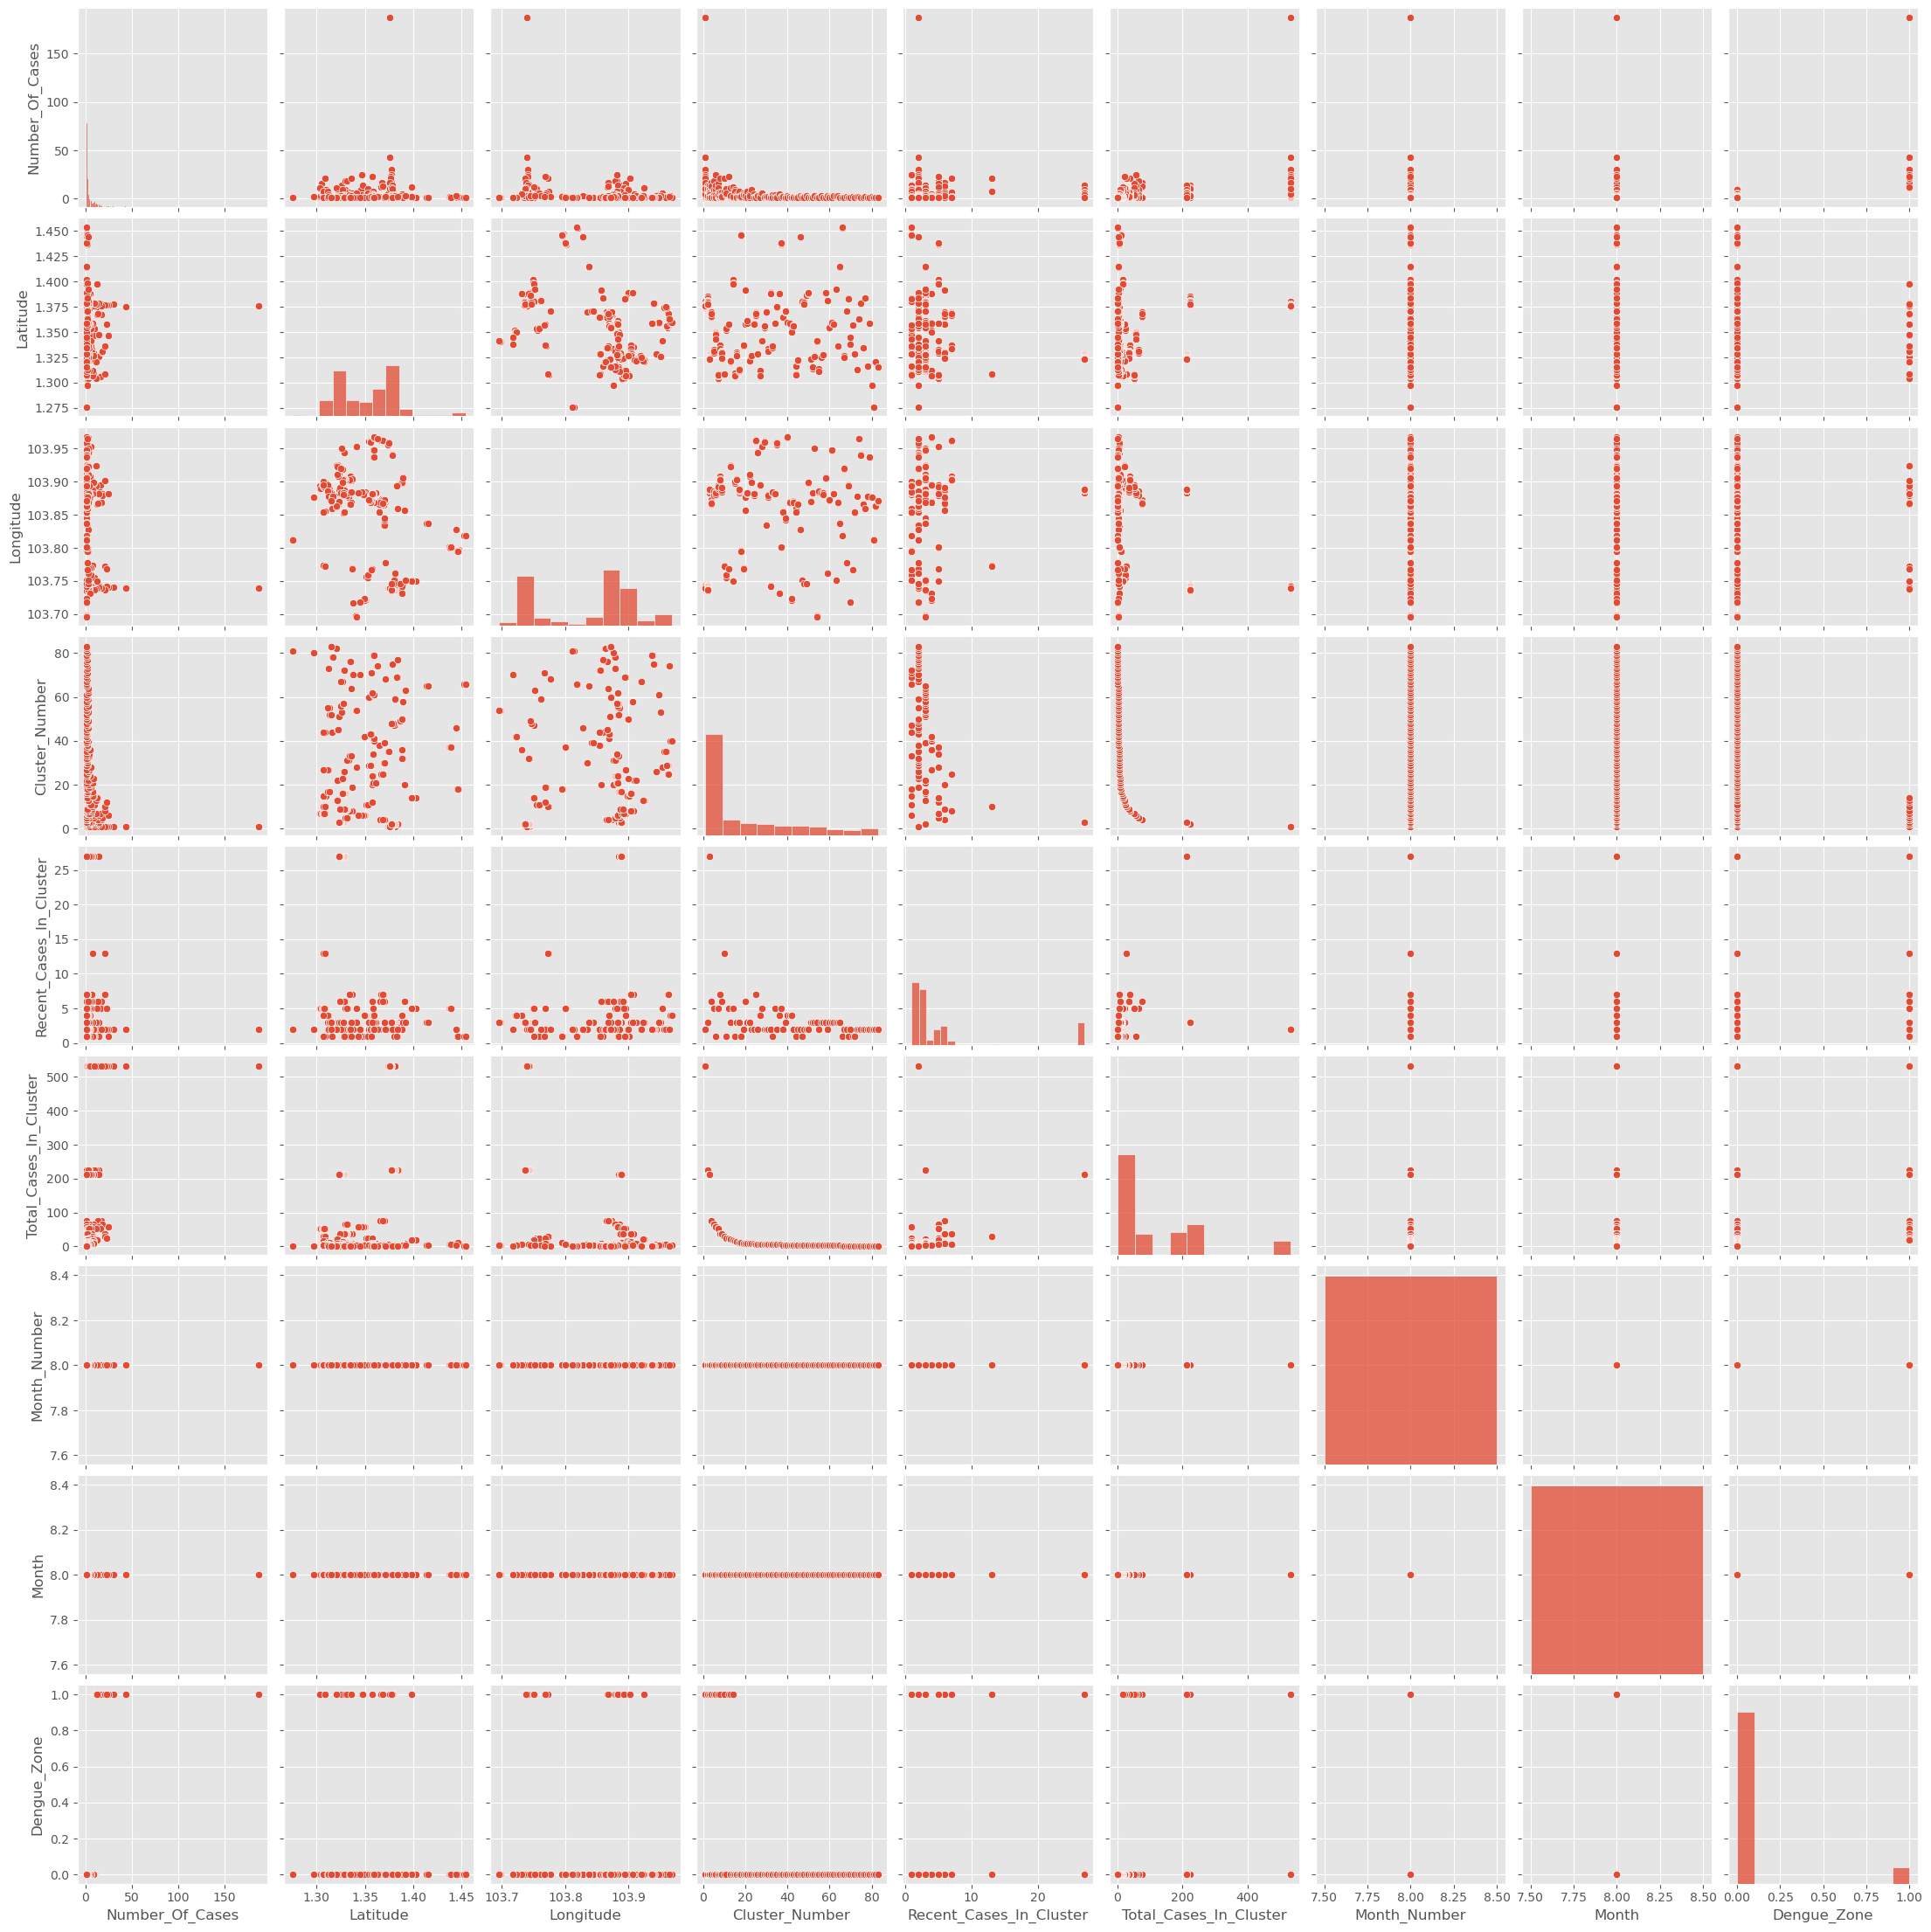

In [47]:
# Pair Plot visualization code
sns.pairplot(df)
plt.show()

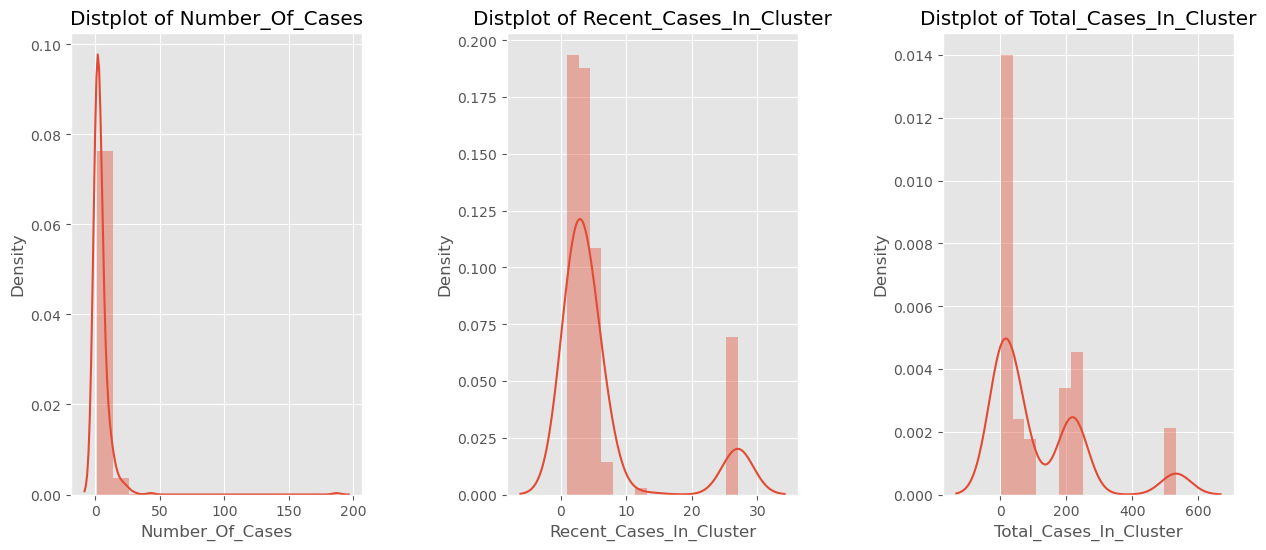

In [108]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Number_Of_Cases' , 'Recent_Cases_In_Cluster' , 'Total_Cases_In_Cluster']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 15)
    plt.title('Distplot of {}'.format(x))
plt.show()

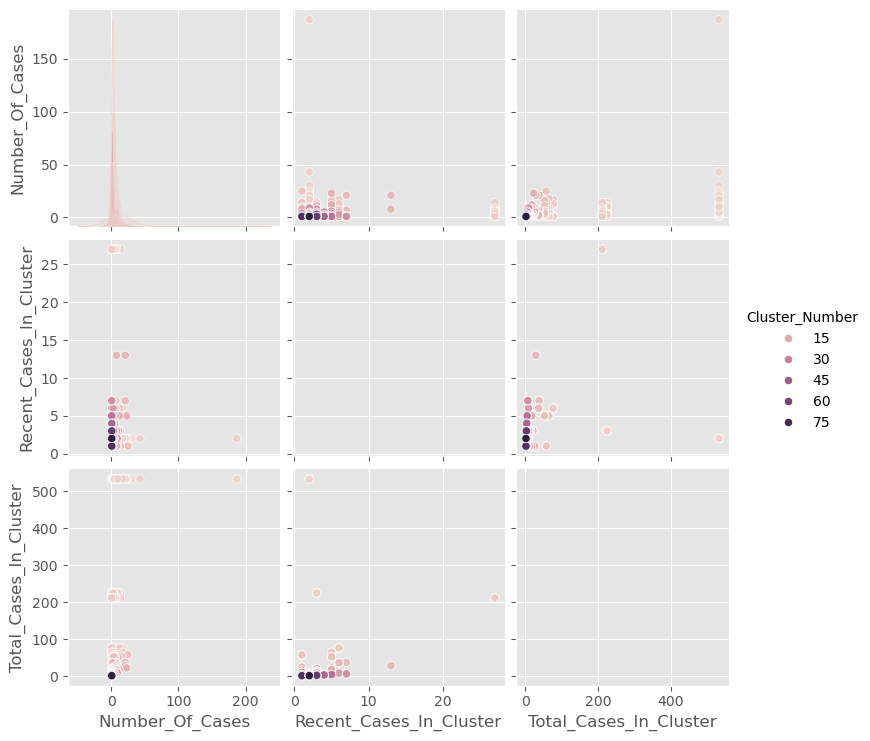

In [110]:
sns.pairplot(df, vars = ['Number_Of_Cases', 'Recent_Cases_In_Cluster', 'Total_Cases_In_Cluster'], hue = "Cluster_Number")

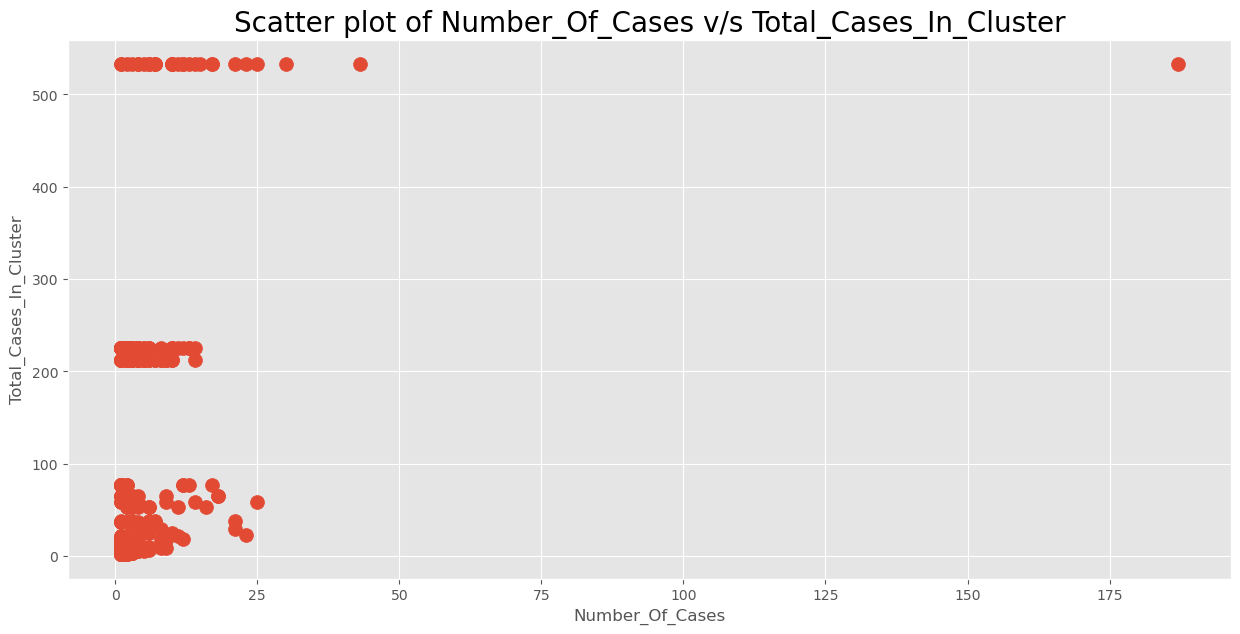

In [114]:
plt.figure(1 , figsize = (15 , 7))
plt.title('Scatter plot of Number_Of_Cases v/s Total_Cases_In_Cluster', fontsize = 20)
plt.xlabel('Number_Of_Cases')
plt.ylabel('Total_Cases_In_Cluster')
plt.scatter( x = 'Number_Of_Cases', y = 'Total_Cases_In_Cluster', data = df, s = 100)
plt.show()

In [116]:
X1 = df[['Number_Of_Cases' , 'Total_Cases_In_Cluster']].iloc[: , :].values
inertia = []
for n in range(1 , 15):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

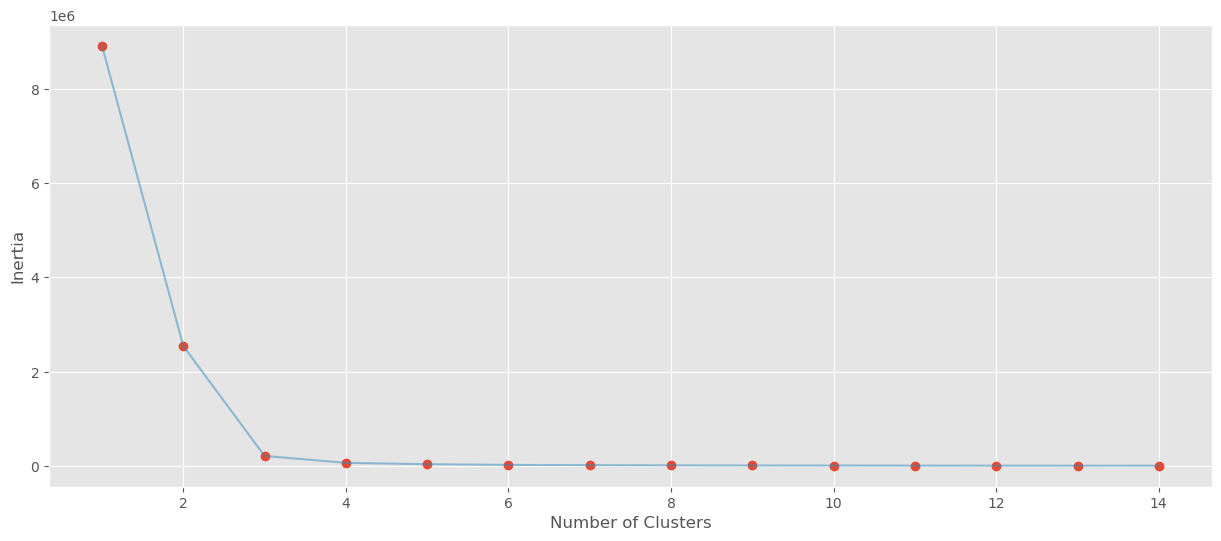

In [118]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 15) , inertia , 'o')
plt.plot(np.arange(1 , 15) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()